In [1]:
import pandas as pd
import os

In [2]:
import sys
import os
sys.path.append(os.path.join("..", "..", ".."))

from mika.kd.trend_analysis import *
from mika.utils.ICS import *
from mika.utils.SAFECOM import *
from mika.utils.SAFENET import *

C:\Users\srandrad\AppData\Roaming\Python\Python38\site-packages\matplotlib\__init__.py:152: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
C:\Users\srandrad\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\srandrad\AppData\Roaming\Python\Python38\site-packages\matplotlib\__init__.py:152: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
C:\Users\srandrad\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\srandrad\AppData\Roaming\Python\Python38\site-packages\matplotlib\__init__.py:152: DeprecationWarning: distutil

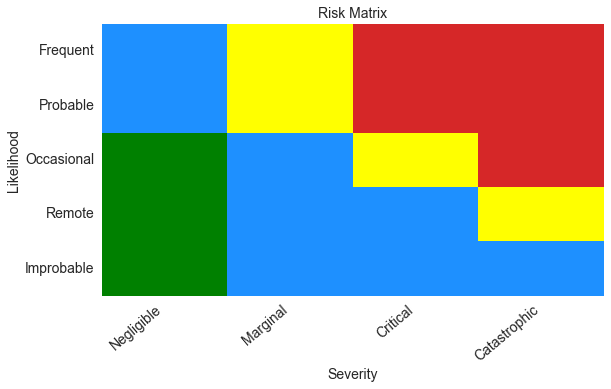

In [3]:
plt.rcParams["font.family"] = "arial"

plot_USFS_risk_matrix({}, {}, figsize=(9,5), save=False, results_path=os.path.join(os.path.dirname(os.getcwd()),'results','risk_matrices', 'blank_rm'), fontsize=14, max_chars=20, title=True)

In [4]:
def get_risk_level_FAA(curr_severities, curr_likelihoods):
    curr_risks ={hazard:'' for hazard in curr_severities}
    risk_dict = {0:"Low", 5: "Medium", 10: "High"}
    df = pd.DataFrame([[0, 5, 10, 10, 10], [0, 5, 5, 10, 10], [0, 0, 5, 5, 10],
            [0, 0, 0, 5, 5], [0, 0, 0, 0, 5]],
          columns=['Minimal Impact', 'Minor Impact', 'Major Impact', 'Hazardous Impact', 'Catastrophic Impact'],
           index=['Frequent', 'Probable', 'Remote','Extremely Remote', 'Extremely Improbable'])
    for hazard in curr_risks:
        curr_risks[hazard] = risk_dict[df.at[curr_likelihoods[hazard], curr_severities[hazard]]]
    return curr_risks

In [5]:
def get_risk_level_USFS(curr_severities, curr_likelihoods):
    curr_risks ={hazard:'' for hazard in curr_severities}
    risk_dict = {1:"Low", 2: "Medium", 3:"Serious", 4:"High"}
    df = pd.DataFrame([[2, 3, 4, 4], [2, 3, 4, 4], [1, 2, 3, 4], [1, 2, 2, 3], [1, 2, 2, 2]],
                      columns=['Negligible', 'Marginal', 'Critical', 'Catastrophic'],
                      index=['Frequent', 'Probable', 'Occasional', 'Remote','Improbable'])
    for hazard in curr_risks:
        curr_risks[hazard] = risk_dict[df.at[curr_likelihoods[hazard], curr_severities[hazard]]]
    return curr_risks

In [6]:
def calc_severity_likelihood_risk_FAA(df, hazards, sev_col, rate_col, data_type):
    if data_type == "ICS":
        rates = {hazard: float(df.at[hazard, rate_col].split("+-")[0]) for hazard in hazards}
        curr_severities = get_ICS_severity_FAA(df, hazards)
        curr_likelihoods = get_likelihood_ICS_FAA(rates)
    elif data_type == "SAFECOM":
        severities = {hazard: df.at[hazard, sev_col] for hazard in hazards}
        rates = {hazard: df.at[hazard, rate_col] for hazard in hazards}
        curr_severities = get_SAFECOM_severity_FAA(severities)
        curr_likelihoods = get_likelihood_FAA(rates)
    elif data_type =="SAFECOM_UAS":
        frequency = {hazard: df.at[hazard, rate_col] for hazard in hazards}
        severities = {hazard: df.at[hazard, sev_col] for hazard in hazards}
        curr_likelihoods = get_UAS_likelihood_FAA(frequency)
        curr_severities = get_SAFECOM_severity_FAA(severities)
    elif data_type =="SAFENET":
        severities = {hazard: df.at[hazard, sev_col] for hazard in hazards}
        rates = {hazard: df.at[hazard, rate_col] for hazard in hazards}
        curr_severities = get_SAFENET_severity_FAA(severities)
        curr_likelihoods = get_UAS_likelihood_FAA(rates)
    curr_risks = get_risk_level_FAA(curr_severities, curr_likelihoods)
    results = pd.DataFrame({"Hazard": hazards,
                           "Likelihood": [curr_likelihoods[h] for h in hazards],
                            "Severity": [curr_severities[h] for h in hazards],
                            "Risk": [curr_risks[h] for h in hazards]
                           })
    return results

In [7]:
def calc_severity_likelihood_risk_USFS(df, hazards, sev_col, rate_col, data_type):
    if data_type == "ICS":
        rates = {hazard: float(df.at[hazard, rate_col].split("+-")[0]) for hazard in hazards}
        curr_severities = get_ICS_severity_USFS(df, hazards)
        curr_likelihoods = get_likelihood_ICS_USFS(rates)
    elif data_type == "SAFECOM":
        severities = {hazard: df.at[hazard, sev_col] for hazard in hazards}
        rates = {hazard: df.at[hazard, rate_col] for hazard in hazards}
        curr_severities = get_SAFECOM_severity_USFS(severities)
        curr_likelihoods = get_likelihood_USFS(rates)
    elif data_type =="SAFECOM_UAS":
        frequency = {hazard: df.at[hazard, rate_col] for hazard in hazards}
        severities = {hazard: df.at[hazard, sev_col] for hazard in hazards}
        curr_likelihoods = get_UAS_likelihood_USFS(frequency)
        curr_severities = get_SAFECOM_severity_USFS(severities)
    elif data_type =="SAFENET":
        severities = {hazard: df.at[hazard, sev_col] for hazard in hazards}
        rates = {hazard: df.at[hazard, rate_col] for hazard in hazards}
        curr_severities = get_SAFENET_severity_USFS(severities)
        curr_likelihoods = get_UAS_likelihood_USFS(rates)
    curr_risks = get_risk_level_USFS(curr_severities, curr_likelihoods)
    results = pd.DataFrame({"Hazard": hazards,
                           "Likelihood": [curr_likelihoods[h] for h in hazards],
                            "Severity": [curr_severities[h] for h in hazards],
                            "Risk": [curr_risks[h] for h in hazards]
                           })
    return results

In [8]:
#read in ICS file with hazards, rates, and severities
ICS = pd.read_csv(os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)),'Journal_TBD','ICS_hazards.csv'), index_col='Hazard Name')
ICS_sev= None
ICS_rate = 'Rate'
ICS_hazards = list(ICS.index)

In [9]:
#calc_severity_likelihood_risk_FAA(ICS, ICS_hazards, ICS_sev, ICS_rate, 'ICS').sort_values(by='Hazard').reset_index(drop=True)#.to_csv("ICS_hazards.csv")

In [10]:
calc_severity_likelihood_risk_USFS(ICS, ICS_hazards, ICS_sev, ICS_rate, 'ICS').sort_values(by='Hazard').reset_index(drop=True)#.to_csv("ICS_hazards.csv")

,Hazard,Likelihood,Severity,Risk
0,Aerial Grounding,Occasional,Critical,Serious
1,Command Transition,Probable,Marginal,Serious
2,Cultural Resources,Occasional,Marginal,Medium
3,Dry Weather,Probable,Marginal,Serious
4,Ecological Resources,Occasional,Marginal,Medium
5,Evacuations,Probable,Critical,High
6,Hazardous Terrain,Probable,Marginal,Serious
7,Infrastructure,Occasional,Critical,Serious
8,Injury,Occasional,Critical,Serious
9,Innacurate Mapping,Probable,Marginal,Serious


In [11]:
#read in SAFECOM manned data with hazards, rates, and severities
SAFECOM = pd.read_csv(os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)),'JAIS_2023', 'SAFECOM_hazards.csv'), index_col='Hazards')
SAFECOM_sev = 'Severity'
SAFECOM_rate = 'Rate'
SAFECOM_hazards = list(SAFECOM.index)

In [12]:
#calc_severity_likelihood_risk_FAA(SAFECOM, SAFECOM_hazards, SAFECOM_sev, SAFECOM_rate, "SAFECOM").sort_values(by='Hazard').reset_index(drop=True).to_csv("SAFECOM_hazards_FAA.csv")

In [13]:
calc_severity_likelihood_risk_USFS(SAFECOM, SAFECOM_hazards, SAFECOM_sev, SAFECOM_rate, "SAFECOM").sort_values(by='Hazard').reset_index(drop=True)#.to_csv("SAFECOM_hazards_USFS.csv")

,Hazard,Likelihood,Severity,Risk
0,Airspace Control Hazards,Occasional,Marginal,Medium
1,Avionics Malfunction,Probable,Negligible,Medium
2,Bucket Drop Failure,Probable,Marginal,Serious
3,Cargo Letdown Failure,Probable,Marginal,Serious
4,Control Surface Damage,Probable,Marginal,Serious
5,Door Failure,Probable,Marginal,Serious
6,Engine Malfunction,Probable,Marginal,Serious
7,Fuel System Malfunction,Probable,Marginal,Serious
8,Helitorch Operations Failure,Occasional,Marginal,Medium
9,Hydraulic Fluid Leak,Probable,Marginal,Serious


In [14]:
#read in SAFECOM unmanned data with hazards, rates, severities
UAS_SAFECOM = pd.read_csv(os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir)), 'FMEA', 'DASC_2022', 'safecom_fmea.csv'), index_col=0)
UAS_SAFECOM_sev = 'Severity'
UAS_SAFECOM_rate = 'Frequency'
UAS_SAFECOM_hazards = list(UAS_SAFECOM.index)

In [15]:
#calc_severity_likelihood_risk_FAA(UAS_SAFECOM, UAS_SAFECOM_hazards, UAS_SAFECOM_sev, UAS_SAFECOM_rate, "SAFECOM_UAS")

In [16]:
calc_severity_likelihood_risk_USFS(UAS_SAFECOM, UAS_SAFECOM_hazards, UAS_SAFECOM_sev, UAS_SAFECOM_rate, "SAFECOM_UAS")

,Hazard,Likelihood,Severity,Risk
0,Battery,Remote,Marginal,Medium
1,Casing dislodged,Remote,Negligible,Low
2,Communications/flight navigation with UAS failed,Remote,Negligible,Low
3,Employee personal drone usage without certific...,Remote,Negligible,Low
4,Engine Failure,Occasional,Marginal,Medium
5,Fight plan error,Occasional,Marginal,Medium
6,Hang Fire,Improbable,Negligible,Low
7,High wind pushes UAS off course,Remote,Marginal,Medium
8,Hobbyist offers services,Improbable,Negligible,Low
9,Inappropriate Landing Site,Improbable,Marginal,Medium


In [17]:
SAFENET = pd.read_csv(os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)),"SAFENET","topic_model_results","safenet_fmea.csv"), index_col=0)
SAFENET_rate = 'Frequency'
SAFENET_hazards = list(SAFENET.index)
SAFENET_sev = 'Severity'

In [18]:
#_ = calc_severity_likelihood_risk_FAA(SAFENET, SAFENET_hazards, SAFENET_sev, SAFENET_rate, "SAFENET").sort_values(by='Hazard').reset_index(drop=True).to_csv("SAFENET_hazards_FAA.csv")

In [19]:
calc_severity_likelihood_risk_USFS(SAFENET, SAFENET_hazards, SAFENET_sev, SAFENET_rate, "SAFENET").sort_values(by='Hazard').reset_index(drop=True)#.to_csv("SAFENET_hazards_USFS.csv")

,Hazard,Likelihood,Severity,Risk
0,Air to Ground Communication,Occasional,Marginal,Medium
1,Bandwidth,Occasional,Marginal,Medium
2,Burn,Occasional,Catastrophic,High
3,Cargo operations overhead,Occasional,Catastrophic,High
4,Communication Disruption,Probable,Marginal,Serious
5,Dehydration,Probable,Catastrophic,High
6,Drug use,Occasional,Marginal,Medium
7,Entrapment,Occasional,Catastrophic,High
8,Falling Objects,Occasional,Catastrophic,High
9,Fatigue,Occasional,Marginal,Medium
